In [2]:
from analytics import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Timestamp Analyses:

## nsp1016_448_cs1.3

- Training on CS1
- LOF on 1 ThetaGPU node
- 160 MD Runs (1 per GPU on 20 ThetaGPU nodes)

Parsing CS1 training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/cs1_run.log
Scanning md_runs for start/end times (this takes a while...)
Total time in ('CVAE', 'LOF', 'I/O') is [291.0, 440.0, 22561.0]


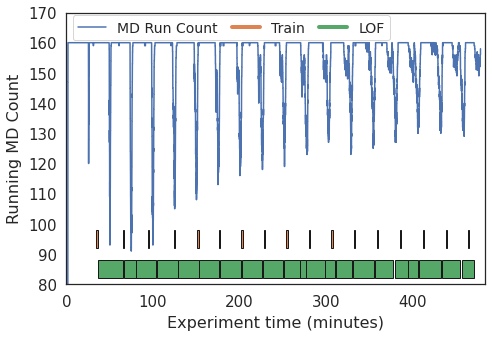

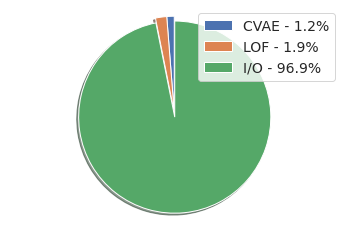

In [3]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/", y_range=90, top_pad=10)
save_fig('timeline_nsp1016_448_cs1.3')
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/")
save_fig('lof_profile_nsp1016_448_cs1.3')

## nsp1016_448_gpu.1

- Training on 1 GPU node
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


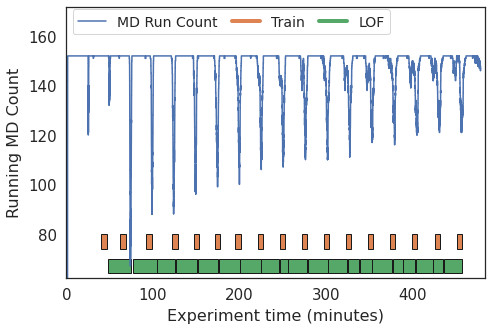

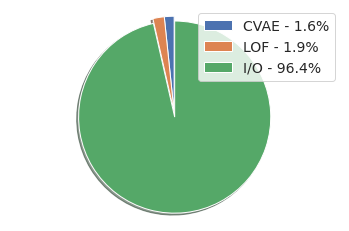

In [4]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/", y_range=110, top_pad=20)
save_fig("timeline_nsp1016-448_gpu.1")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.1/")
save_fig("lof_profile_nsp1016-448_gpu.1")

## nsp1016_448_gpu.2

- Training on 4 GPU nodes
- LOF on 1 ThetaGPU node
- 128 MD Runs (1 per GPU on 16 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/training.log
Scanning md_runs for start/end times (this takes a while...)
Total time in ('CVAE', 'LOF', 'I/O') is [328.0, 250.0, 19924.0]


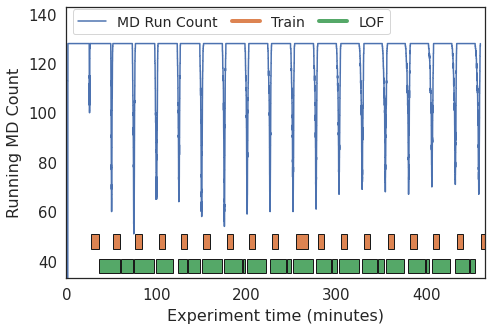

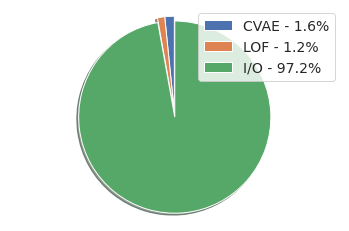

In [2]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/", y_range=110, top_pad=15)
save_fig("timeline_nsp1016-448_gpu.2")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_gpu.2/")
save_fig("lof_profile_nsp1016-448_gpu.2")

Total time in ('CVAE', 'LOF', 'I/O') is [224.0, 423.0, 263.0]
Total time in ('CVAE', 'LOF', 'I/O') is [291.0, 440.0, 22561.0]


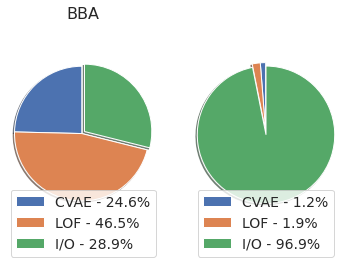

In [21]:
fig, axes = plt.subplots(ncols=2)
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/", ax=axes[0], legend_loc="lower center", legend_pos=(0.5, -0.1), title="BBA")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/nsp1016_448_cs1.3/", ax=axes[1], legend_loc="lower center", legend_pos=(0.5, -0.1))

## bba_28_gpu.1

- Training on 1 GPU nodes
- LOF on 1 ThetaGPU node
- 152 MD Runs (1 per GPU on 19 ThetaGPU nodes)

Parsing GPU training log: /projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/training.log
Scanning md_runs for start/end times (this takes a while...)


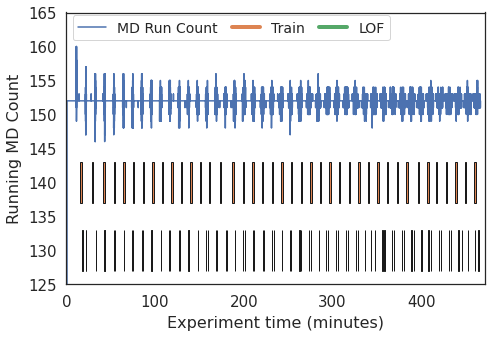

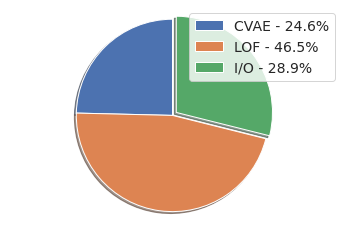

In [6]:
experiment_timeline("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/", y_range=40)
save_fig("timeline_bba_28_gpu.1")
draw_lof_profile("/projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/")
save_fig("lof_profile_bba_28_gpu.1")

# Learning Curve Analysis

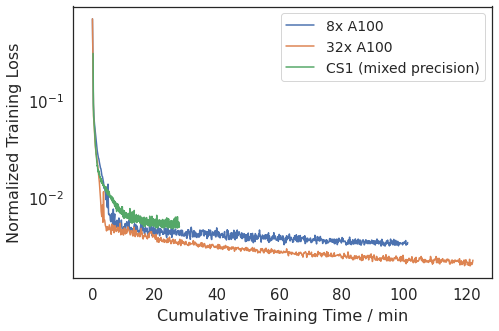

In [23]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"nsp1016_448_gpu.1", p/"nsp1016_448_gpu.2", p/"nsp1016_448_cs1.3"]
labels = ["8x A100", "32x A100", "CS1 (mixed precision)"]
plot_losses(paths, labels=labels,  as_time=True, scale=1/448.**2, log_scale=True)
save_fig("learning_curves_nsp1016")

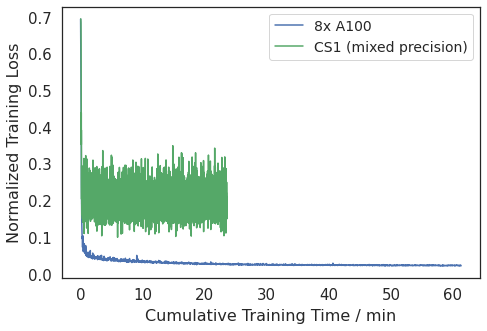

In [24]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_gpu.1", p/"bba_28_cs1.1"]
labels = ["8x A100", "CS1 (mixed precision)"]
plot_losses(paths, labels=labels, colors=[C1,C3], as_time=True, scale=1/28.**2, log_scale=False)
save_fig("learning_curves_bba")

# Conformational Sampling Analysis:

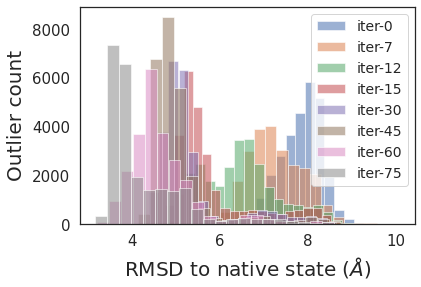

In [9]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier count"
iterations = list(range(0, 82, 15)) + [7, 12]
plot_conformational_sampling(paths, iterations, xlabel, ylabel)

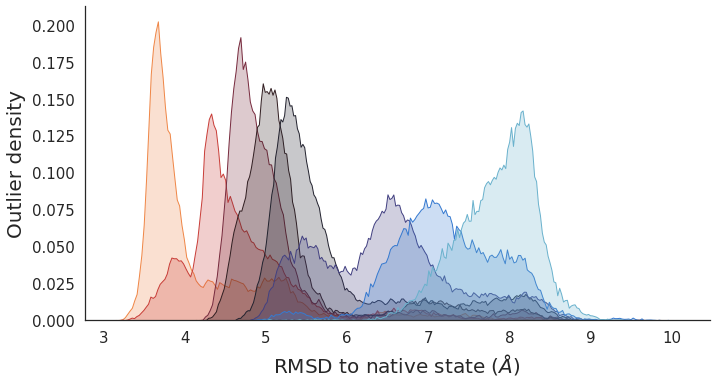

In [10]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
iterations = list(range(0, 82, 15)) + [7, 12]
labels=[f"Iteration {i}" for i in sorted(iterations)]
kde_conformational_sampling(paths, iterations, labels=labels, xlabel=xlabel, ylabel=ylabel, aspect=2.0)
save_fig("rmsd_kdes_bba_28_cs1.1")

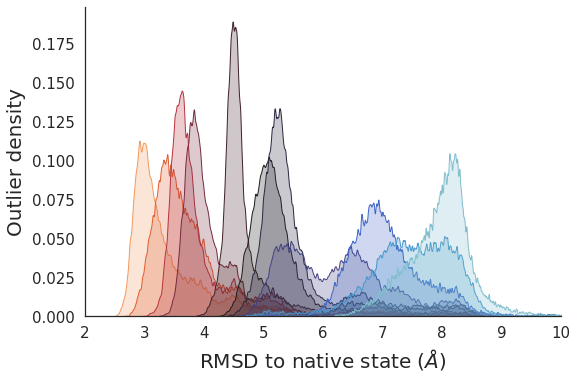

In [31]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_cs1.2"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
#iterations = list(range(0, 178, 15))
iterations = list(range(0, 30, 5)) + [60, 90, 120, 150, 178] 
labels=[f"Iteration {i}" for i in sorted(iterations)]
g = kde_conformational_sampling(paths, iterations, labels=labels, xlabel=xlabel, ylabel=ylabel, aspect=1.6)
g.ax.set_xlim(2,10)
save_fig("rmsd_kdes_bba_28_cs1.2")

8x A100 is from /projects/RL-fold/msalim/production-runs/pasc/bba_28_gpu.1/outlier_runs/rmsds-1607352683.npy mean 5.06
CS1 (mixed precision) is from /projects/RL-fold/msalim/production-runs/pasc/bba_28_cs1.1/outlier_runs/rmsds-1607669734.npy mean 4.117


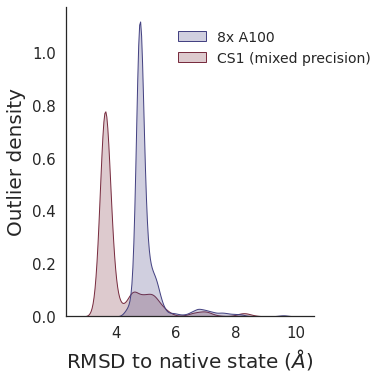

In [9]:
p = Path("/projects/RL-fold/msalim/production-runs/pasc/")
paths = [p/"bba_28_gpu.1", p/"bba_28_cs1.1"]
xlabel = r"RMSD to native state $(\AA)$"
ylabel = "Outlier density"
labels = ["8x A100", "CS1 (mixed precision)"]
kde_run_comparison(paths, iteration=-1, labels=labels, xlabel=xlabel, ylabel=ylabel, legend_pos=(0.75, 0.85))
save_fig("BBA_gpu_vs_cs1")